# Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Warnings
import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [34]:
df = pd.read_csv("hotel.csv", encoding="latin-1")
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


## We take a brief look

In [35]:
print("Filas: ", df.shape[0])
print("Columnas: ", df.shape[1])

Filas:  119390
Columnas:  32


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [37]:
df.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [38]:
df.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [39]:
df.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [40]:
df.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [41]:
# Vemos valores de 10 niños
df.children.unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [42]:
df.babies.unique()

array([ 0,  1,  2, 10,  9], dtype=int64)

In [43]:
def delete_overpax(df):
    # We remove what we assume are "typos", based on capacity
        # We remove the single row where the 'children' field contains the number 10
    df.drop(df[df['children'] > 10].index, inplace=True)
    df.drop(df[df['babies'] >= 10].index, inplace=True)
        # We will classify bookings with more than 4 adults as group bookings..
    df.drop(df[df['adults'] > 4].index, inplace=True)
    df.drop(df[df['adults'] == 0].index, inplace=True)
    # We will delete the ~300 rows with an adr (average daily rate) less than or equal to 15.
    df.drop(df[df['adr'] <= 15].index, inplace=True) 
    df.children.fillna(0, inplace = True)
    return df
delete_overpax(df)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [19]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,117181.000000,117181.000000,117181.000000,117181.000000,117181.000000,117181.000000,117181.000000,117181.000000,117177.000000,117181.000000,117181.000000,117181.000000,117181.000000,117181.000000,101807.000000,6377.000000,117181.000000,117181.000000,117181.000000,117181.000000
mean,0.374873,105.053848,2016.160137,27.137428,15.800983,0.935988,2.520298,1.864568,0.100890,0.007774,0.027914,0.087113,0.125515,0.215564,86.686986,194.209346,2.342905,103.578373,0.062723,0.570135
std,0.484092,106.929483,0.706866,13.572662,8.783571,0.994759,1.890633,0.474946,0.390228,0.092652,0.164727,0.849569,1.447499,0.630475,110.755979,130.882959,17.695496,49.210121,0.245717,0.791170
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,19.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,67.000000,0.000000,70.530000,0.000000,0.000000
50%,0.000000,71.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,195.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,162.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,274.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,709.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,4.000000,3.000000,9.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [20]:
df.columns.unique()

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [21]:
df.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [22]:
# Vemos los valores nulos del df
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              467
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              15374
company         

Tras ver los  nulls, procedemos a quitar las columnas que no vamos a usar.

In [23]:
def drop_columns(df):
    # We delete these columns as they will not be useful for our analysis.
    df.drop(columns =["arrival_date_week_number", "reservation_status_date", "agent", "company", "hotel", "reservation_status"], inplace = True)
    return df

In [24]:
print("Filas: ", df.shape[0])
print("Columnas: ", df.shape[1])

Filas:  117181
Columnas:  28


In [25]:
df.days_in_waiting_list.value_counts()

0      113515
39        227
58        164
44        141
31        127
        ...  
121         1
165         1
37          1
193         1
36          1
Name: days_in_waiting_list, Length: 127, dtype: int64

In [26]:
# Let's assume that the 4 null values we have in the children column mean there are no children in the room. If there were children, measures would have been taken since rooms have a legal limit on the number of people (regardless of age) allowed in them.
df.children.fillna(0, inplace = True)
df.children.isnull().sum()

0

Before removing the null values from the country column, we will first divide the dataset into 2 different sets to separately observe how the values in the column are distributed. Once we have analyzed this, we will take the necessary measures in each dataset to handle these values.

In [27]:
def change_months(df):
    # We create a column called "arrival_date" by converting the values from date-related columns to integers, and then adding them to the newly created column.
    month_dict = {'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12}
    df["arrival_date_month"] = df["arrival_date_month"].apply(lambda x: month_dict[x])
    df["arrival_date"] = pd.to_datetime({"year": df["arrival_date_year"], 
                                      "month": df["arrival_date_month"], 
                                      "day": df["arrival_date_day_of_month"]}).dt.strftime('%d/%m/%Y')
    return df

In [29]:
def LOS(df):
    # We create a column called LOS (Length Of Stay) by converting the values from relevant columns to integers and then summing them up 
    df['stays_in_weekend_nights'] = df['stays_in_weekend_nights'].astype(int)
    df['stays_in_week_nights'] = df['stays_in_week_nights'].astype(int)
    
    df["L.O.S."] = df["stays_in_weekend_nights"]+ df["stays_in_week_nights"]
    return df

In [30]:
"In a real case, we would need to verify if No-Shows have been partially charged, as well as the canceled bookings. However, to simplify the analysis tasks for this dataset, we make the following assumptions:"

# We will assume that No-Show bookings have been fully charged. Therefore, we will categorize the booking status into 2 categories: Canceled and "Check-Out". We also assume that canceled bookings have not generated any revenue. Hence, we can classify them as bookings that have generated revenue and those that have not, assigning values of 1 and 0 respectively.

# We create a column to identify which bookings have generated revenue and which have not.

df["Generates_Rev"] = np.where(df['reservation_status'] == "Canceled", 0, 1)

In [36]:
def various_(df):
    # delete column days_in_waiting_list
    df.drop("days_in_waiting_list",axis = 1, inplace = True)
    df["adults"] = df['adults'].apply(lambda x: int(x))
    df["children"] = df['children'].apply(lambda x: int(x))
    # We change the value of rows in the "adr" column from 5400 to 540, considering that the next lowest value is 510. This leads us to conclude it was a typo and the actual value should be 540.
    df['adr'].replace(to_replace=5400, value=540, inplace=True)
    df["room_pax"] = df["adults"] + df["children"] 
    df["Generates_Rev"] = np.where(df['reservation_status'] == "Canceled", 0, 1)
    return df

In [37]:
df["adr"].nlargest(10)

48515     540.00
111403    510.00
15083     508.00
103912    451.50
13142     450.00
13391     437.00
39155     426.25
39568     402.00
39118     397.38
13323     392.00
Name: adr, dtype: float64

## 1.3 Divide dataset into 2 different datasets

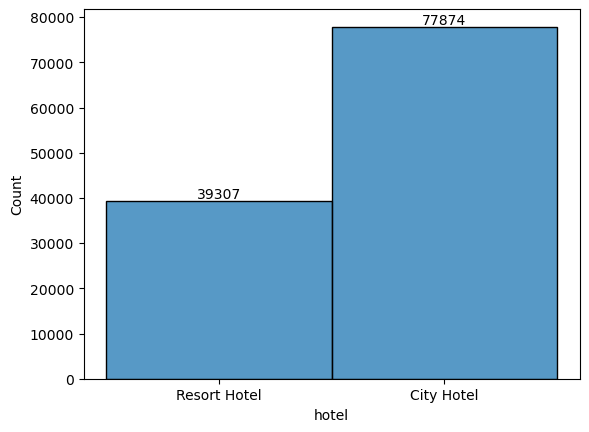

In [38]:
sns.histplot(df["hotel"])
ax = plt.gca()
ax.bar_label(ax.containers[1])
plt.show()

As we can see, the company has 2 hotels with an irregular distribution of bookings. Therefore, we will divide the dataframe into 2, one for City Hotel and another for Resort Hotel, not only due to the nature of the customers but also because of other factors such as LOS (Length Of Stay) or LT (Lead Time).

Before dividing the dataframe into 2, we performed the same preprocessing on the combined dataset (except for the country column) to later analyze the two dataframes separately.

In [1]:
dfr = df[df["hotel"] == "Resort Hotel"].copy()
dfr.shape

NameError: name 'df' is not defined

In [40]:
dfc = df[df["hotel"] == "City Hotel"].copy()
dfc.shape

(77874, 31)

Procedemos a quitar los valores nulos de la columna 'country'

In [41]:
dfr.country.isnull().value_counts()

False    38856
True       451
Name: country, dtype: int64

In [42]:
# Drop nulls
dfr = dfr.dropna()

In [43]:
# City Hotel
dfc.country.value_counts().mode

<bound method Series.mode of PRT    29914
FRA     8738
DEU     6040
GBR     5279
ESP     4566
       ...  
SYC        1
JAM        1
ZMB        1
NAM        1
COM        1
Name: country, Length: 166, dtype: int64>

In [44]:
dfc.country.isnull().value_counts()

False    77858
True        16
Name: country, dtype: int64

In [45]:
dfc = dfc.dropna()

In [46]:
dfc.shape

(77858, 31)

In [47]:
# Therefore, we have 2 dataframes without null values to proceed with the EDA with the following shapes.:

print("Shape dfc: ",dfc.shape)
print("Shape dfr: ",dfr.shape)

Shape dfc:  (77858, 31)
Shape dfr:  (38856, 31)


In [48]:
# We save the dataframes separately since we will be working with them individually.
dfc.to_csv("DataFrameCityHotel.csv", index = False)
dfr.to_csv("DataFrameResortHotel.csv", index = False)